# Python Week 5

October 12, 2019

This week, we dig into numpy and matplotlib more since these two packages are frequently used for processing and plotting  data. We are slowly entering into data science. 

For numpy, we need to understand reshaping and slicing. Reshaping means change the shape of dataset for example, from a 2D matrix form to a 1D vector form. Slicing is a convenient, simple notation to access partial data. If our data is a 3D matrix like cube, how do we plot/handle the top layer like a 2D image? This kind of job can be done easily using the slicing technique. We'll experiment with 28x28 figures in the MNIST dataset. A small portion of it is provided for your convenience in the github directory. 
For matplotlib, we try to visualize 2D data (image) as we plotted time series data last week. For 2D plotting, we'll use plt.imshow and many options will be tested to make our plots more beautiful and impressive.

Enjoy this week's example.

In [85]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

## slicing

In [17]:
my1d = np.random.randn(5)

In [18]:
my1d

array([0.32171054, 0.43765947, 0.1473978 , 1.68257159, 0.61342921])

In [19]:
# how do we access the first element?
print(my1d[0])

0.3217105421912333


In [22]:
# how about first two elements?
print(my1d[0:2])

[0.32171054 0.43765947]


In [28]:
# how about first, third, fifth, skipping by one.
print(my1d[0::2]) # print(my1d[0:5:2]) will give you the same result
# please not that my1d[0:1] will give you only the first element.
# because the second index is not included.
# my1d[n1:n2] will show elements from n1 to n2-1.
# let's try it
print(my1d[0:5:2])

[0.32171054 0.1473978  0.61342921]
[0.32171054 0.1473978  0.61342921]


In [ ]:
# how to access the last element?
# will this work? 
print(my1d[5])

In [34]:
# A correct way is 
print(my1d[4]) # since numpy arrays are using 0-based index, meaning the index starts from 0 instead of 1

# this is *NOT CONVENIENT* because you need to know the length and to do minus 1 to the length
# A much more convenient way is
print(my1d[-1])

0.6134292054482687
0.6134292054482687


In [38]:
# how about the last two elements?
print(my1d[-2:]) # print(my1d[-2:-1]) does NOT do the job because 

[1.68257159 0.61342921]


In [48]:
# Let's try 2D data
my2d = np.random.randn(3, 2)

In [50]:
my2d

array([[ 0.3017315 , -0.31284389],
       [ 1.25740625,  0.4816095 ],
       [ 0.70527552,  1.36903856]])

In [51]:
# Let's print the first row.
print(my2d[0,:])

[ 0.3017315  -0.31284389]


In [54]:
# Can you print the first TWO rows? Yes, you can.
print(my2d[0:2,:])

[[ 0.3017315  -0.31284389]
 [ 1.25740625  0.4816095 ]]


In [56]:
# How about the first column of the first two rows?
print(my2d[0:2, 0])

[0.3017315  1.25740625]


In [69]:
# Let's make it into a 1D vector
my1dfrom2d = my2d.flatten()

In [73]:
my1dfrom2d

array([ 0.3017315 , -0.31284389,  1.25740625,  0.4816095 ,  0.70527552,
        1.36903856])

In [79]:
my2d.reshape(6)
# can you tell differences between my2d.reshape(6,1) and my2d.reshape(6)

array([ 0.3017315 , -0.31284389,  1.25740625,  0.4816095 ,  0.70527552,
        1.36903856])

In [82]:
# we can use negative indices like -1, -2 as we did for 1D arrays.
my2d[-1,:]

array([0.70527552, 1.36903856])

In [83]:
my2d[-1,-1]

1.3690385556174385

## plotting 2D data

In [43]:
# Let's make a matrix 10000 x 256
# Each row corresponds to  your data point, image, ...
# 

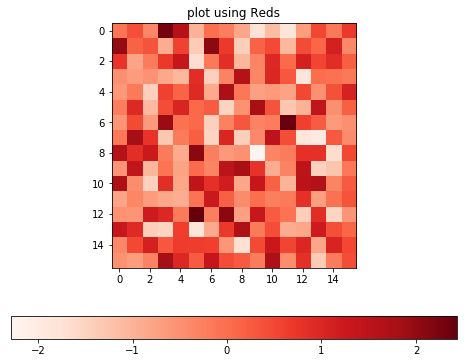

In [84]:
# We need to generate 10000 datapoints or images of length 256 or 16*16
mydata = np.random.randn(10000, 16, 16)

# let's plot one of them

plt.figure(figsize=(8,6)) #if you want to change the size of the figure
plt.imshow(mydata[0,:,:], cmap = cm.RdBu, alpha=1.0) # alpha for transparency
#plt.set_cmap('jet') This is a way to change its colormap to a different one.

# in order to find a list of colormaps
cms = plt.colormaps()

# what's the type of 'cms'?
#  
plt.set_cmap(cms[54])
plt.title('plot using ' + cms[54])

#plt.imshow(mydata[0,:,:], vmin=-0.5, vmax=0.5)
#plt.colorbar() # plot(add) a vertical scale bar on the right
# if you want a horizontal scale bar at the bottom of the main figure
plt.colorbar(orientation='horizontal', fraction = 0.1)


In [70]:
plt.imshow?

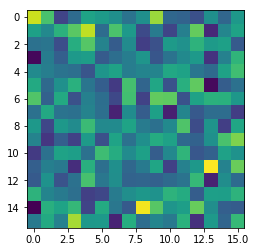

In [5]:
## How can we plot the last image of size 16x16 ?
## Can you complete the following command, plt.imshow(mydata[   ])?

In [6]:
## Since it is more fun to play with numbers, let's use MNIST datasets
xtest = np.load('xtest.pickle')

## Question: what's the dimension of xtest?


In [9]:
xtest.shape

(10000, 28, 28)

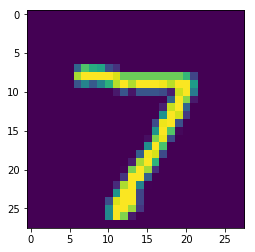

In [10]:
## Let's plot the first image of 28 x 28.
plt.imshow(xtest[0, :,:])

In [30]:
## Now, sometimes we need to convert 2D images into 1D vectors.
## For example, my2d = xtest[0,:,:] can be put into a 1D vector of length 28x28
my2dImage  = xtest[0, :, :]
my1d_flattened = my2dImage.flatten()
# or
my1d_reshaped = my2dImage.reshape(28*28,)

In [31]:
## Let's check the shape (dimension) of "my1d"
my1d_flattened.shape

(784,)

In [34]:
my1d_reshaped.shape

(784,)

In [36]:
xtest2d = np.reshape(xtest, (10000,-1))

In [37]:
xtest2d.shape

(10000, 784)

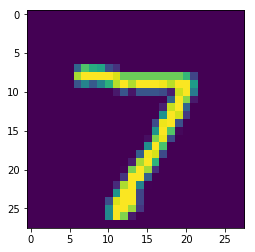

In [41]:
#Let's make sure that the first row is the image of number "7" we saw above
plt.imshow(xtest2d[0,:].reshape(-1,28))